In [ ]:
##https://gist.github.com/tartakynov/83f3cd8f44208a1856ce

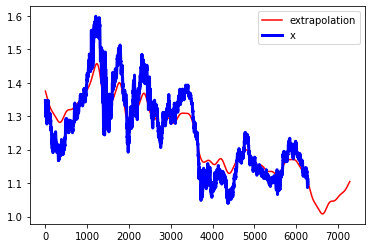

          0
0  1.375072
1  1.374626
2  1.374177
3  1.373727
4  1.373275


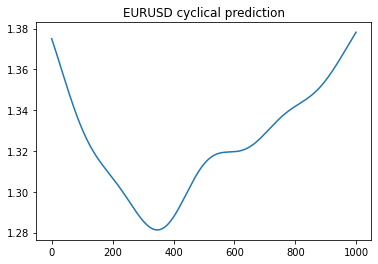

In [38]:
import numpy as np
import pylab as pl
from numpy import fft
import pandas as pd
import datetime as dt
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 12                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = range(n)
    # sort indexes by frequency, lower -> higher
    indexes = list(range(n))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    
def main():
    
    # get data
    df = pd.read_csv(r'C:\Users\Chris\Desktop\UlsterUniversity\Final Project\PySimpleGUI\Closedf.csv', parse_dates = True, index_col = 'Date')
    df = df[['EURUSD=X', 'GBPUSD=X']]

    # specifying period
    end = dt.datetime.now()  # end date is now
    start = dt.datetime(2005, 1, 1)   # start date  
    df = df[start:end]
    # setting frequency
    df = df.asfreq('D') # changes frequency to daily
    #df.index # checks the frequency at bottom of printout
    
    # fills NaN's
    df = df.fillna(method = 'backfill')  # takes the close rows and fills in missing values back
    df = df.fillna(method = 'ffill')  # takes the close rows and fills in missing values forwards, for some markets operating at different days
    
    # data = df
    x = df['EURUSD=X']
    
    ##

    

    n_predict = 1000 # steps to predict
    extrapolation = fourierExtrapolation(x, n_predict)
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
    pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
    pl.legend()
    pl.show()

    # get cyclical prediction 

    # convert to dataframe
    fft_signal = pd.DataFrame(extrapolation)

    print(fft_signal.head())
    # get only the prediction
    fft_pred = fft_signal[:1000]
    fft_hist = fft_signal[:-1000]


    import matplotlib.pyplot as plt

    plt.plot(fft_pred)
    plt.title('EURUSD cyclical prediction')
    plt.show()

    #plt.plot(fft_hist)
    #plt.show()







main()